# Projet Hackathon : Quelle(s) énergie(s) pour demain ? 

## Imports 

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import os
sns.set()

## Open datas 

In [3]:
dataPath ='/'.join(os.getcwd().split("/")[:-1])+"/data/"

### Oil production

In [4]:
oil_production = pd.read_excel(dataPath+"data_production.xlsx", 1,  header = 2)

In [5]:
def clean (df, unite) :
    indexUSSR = np.where(df[unite]=="USSR")[0][0]
    indexRussie = np.where(df[unite]=="Russian Federation")[0][0]
    df.iloc[indexUSSR] = df.iloc[indexUSSR].fillna(0) + df.iloc[indexRussie].fillna(0)
    df = df.dropna(thresh= len(df.columns)-20).fillna(0)
    return df

def separate_total(df, unite) :
    df_tot = pd.DataFrame(df[df[unite].str.contains("Total")]).set_index(unite)
    df = df[df[unite].str.contains("Total") == False].set_index(unite)
    return df_tot, df

def print_df(df, title, unite) :
    plt.figure(figsize=(12,10))
    plt.title(title, fontSize=18)
    for k,pays in enumerate(df.index) :   
        plt.plot(df.columns.values[:-5], df.iloc[k][:-5], label=f"{pays}")
    plt.legend(bbox_to_anchor = (1,1))
    plt.xlabel("Année")
    plt.ylabel(unite)
    plt.show()
    
def set_name_df(df,name) :
    df.name = name
    return df

In [6]:
unite = "Million tonnes"
oil_production = clean(oil_production,unite)
oil_production_total, oil_production = separate_total(oil_production,unite)
oil_production_total, oil_production = set_name_df(oil_production_total, "Total oil"), set_name_df(oil_production_total, "Oil")

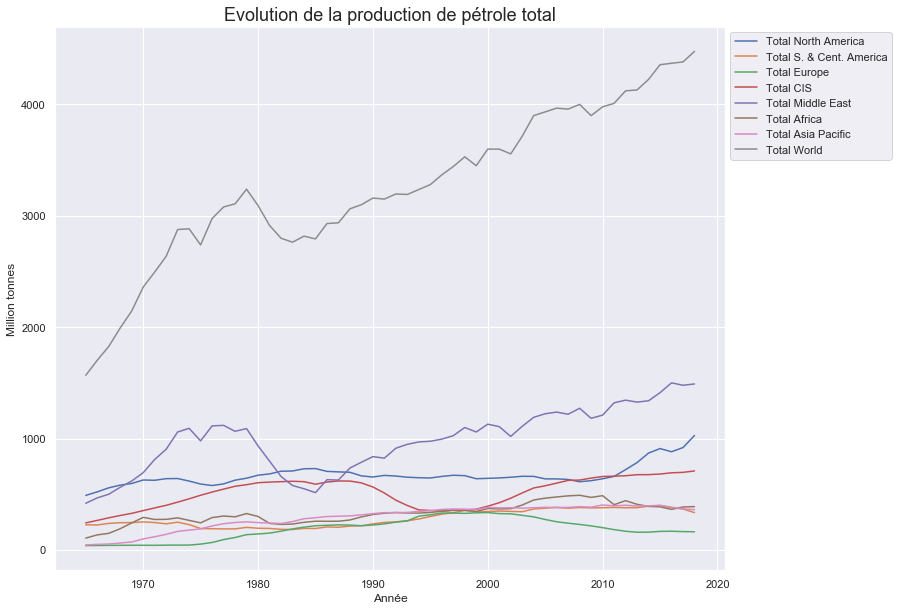

In [7]:
print_df(oil_production_total, "Evolution de la production de pétrole total", unite)

### Gaz production

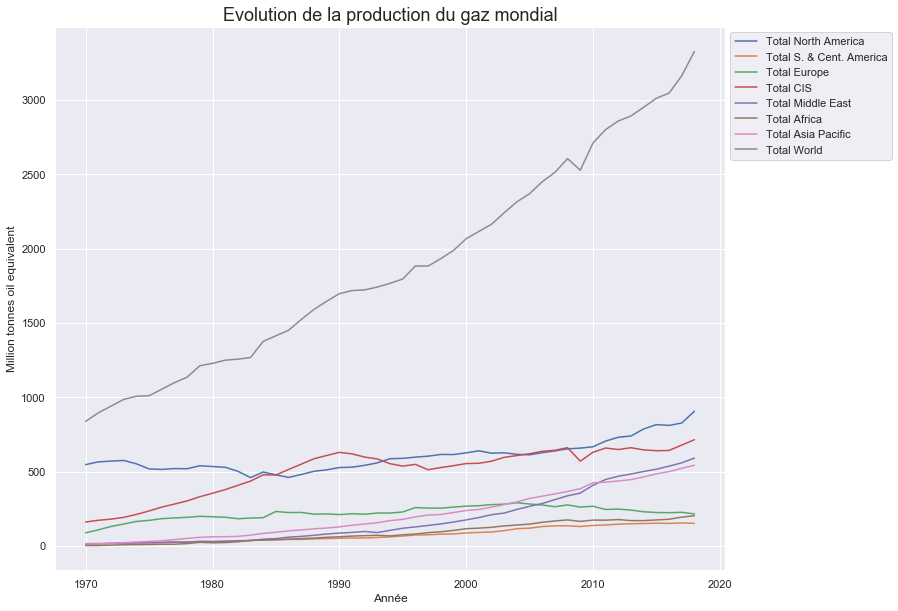

In [8]:
gaz_production = pd.read_excel(dataPath+"data_production.xlsx", 5, header = 2)
unite = "Million tonnes oil equivalent"
gaz_production = clean(gaz_production, unite)
gaz_production_total, gaz_production = separate_total(gaz_production, unite)
gaz_production_total, gaz_production = set_name_df(gaz_production_total, "Total gaz"), set_name_df(gaz_production_total, "gaz")
print_df(gaz_production_total, "Evolution de la production du gaz mondial", unite)

### Coal production 

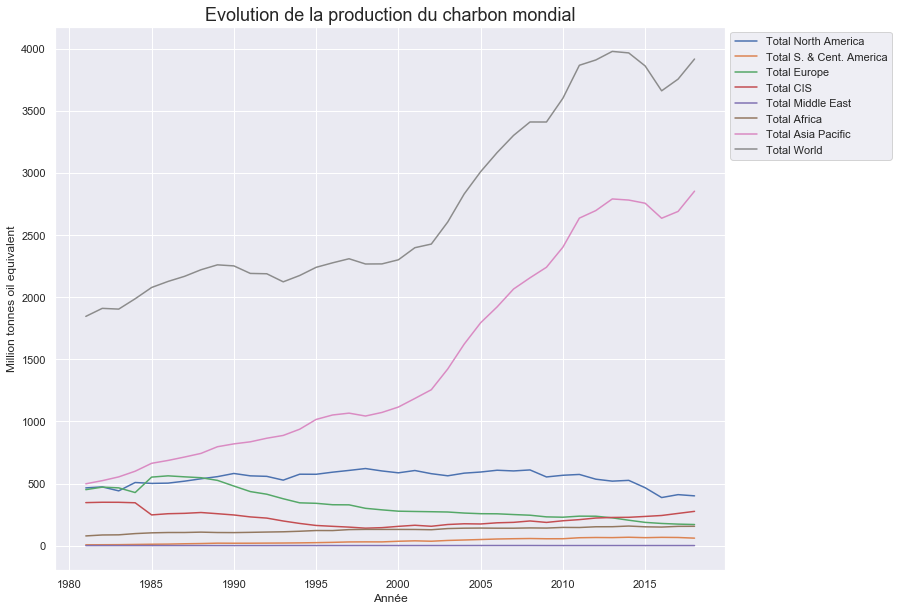

In [9]:
coal_production = pd.read_excel(dataPath+"data_production.xlsx", 7, header = 2)
unite = "Million tonnes oil equivalent"
coal_production = clean(coal_production,unite)
coal_production_total, coal_production = separate_total(coal_production, unite)
coal_production_total, coal_production = set_name_df(coal_production_total, "Total coal"), set_name_df(coal_production_total, "coal")
print_df(coal_production_total, "Evolution de la production du charbon mondial", unite)

### Nuclear : 

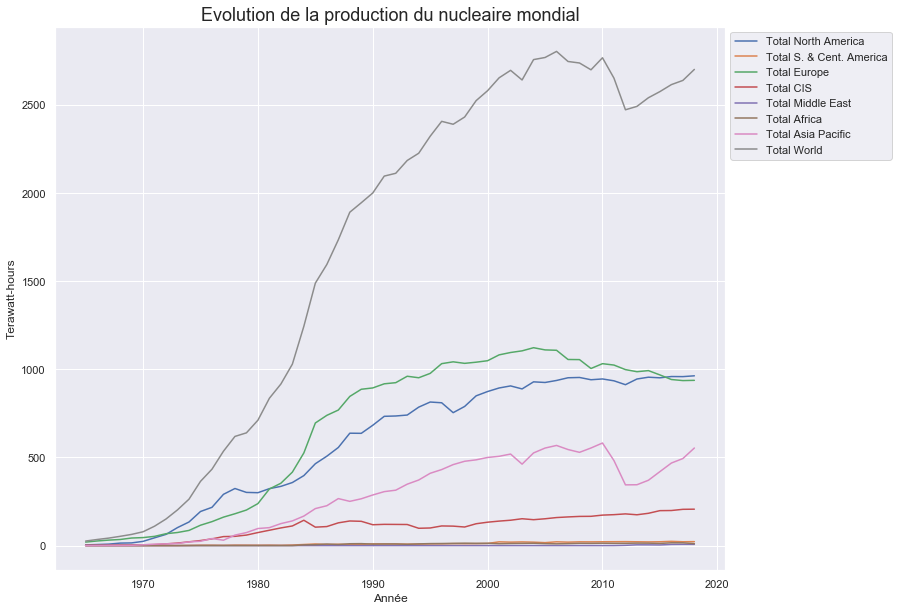

In [10]:
nuclear_production = pd.read_excel(dataPath+"data_production.xlsx", 8, header = 2)
unite = "Terawatt-hours"
nuclear_production = clean(nuclear_production,unite)
nuclear_production_total, nuclear_production = separate_total(nuclear_production, unite)
nuclear_production_total, nuclear_production = set_name_df(nuclear_production_total, "Total nuclear"), set_name_df(nuclear_production_total, "nuclear")
print_df(nuclear_production_total, "Evolution de la production du nucleaire mondial", unite)

### Hydro-generation 

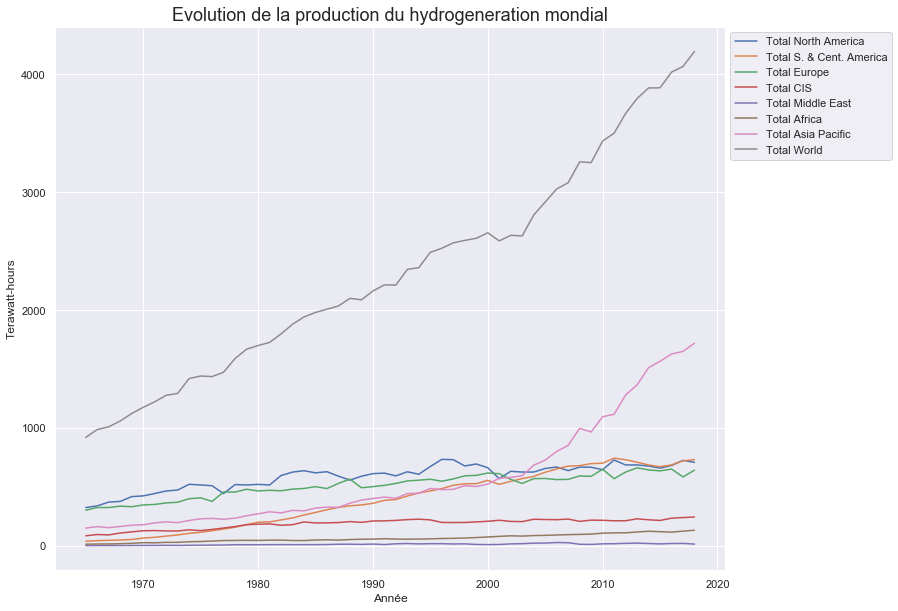

In [11]:
hydro_production = pd.read_excel(dataPath+"data_production.xlsx", 9, header = 2)
unite = "Terawatt-hours"
hydro_production = clean(hydro_production,unite)
hydro_production_total, hydro_production = separate_total(hydro_production, unite)
hydro_production_total, hydro_production = set_name_df(hydro_production_total, "Total hydro"), set_name_df(hydro_production_total, "hydro")
print_df(hydro_production_total, "Evolution de la production du hydrogeneration mondial", unite)

### Energie renouvelable : 


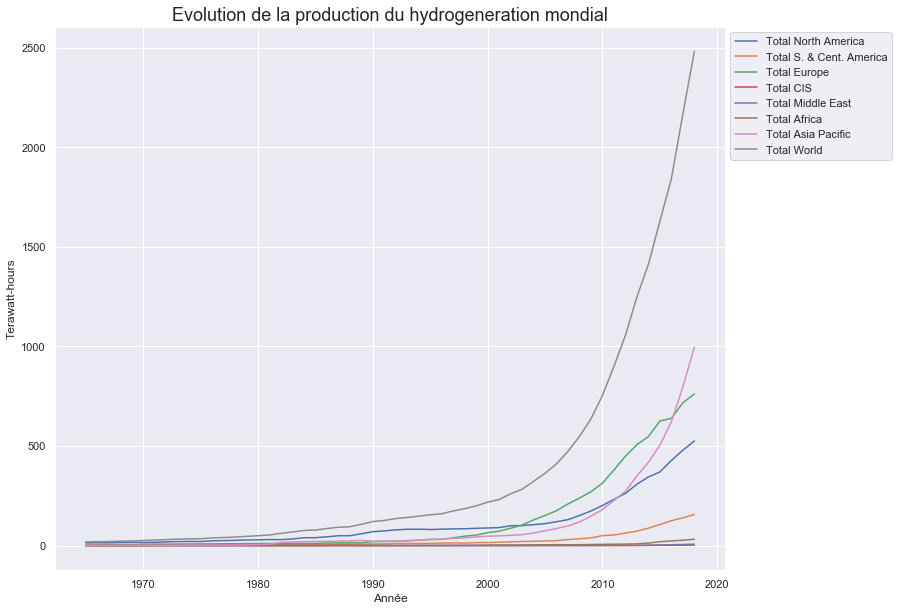

In [12]:
renewable_production = pd.read_excel(dataPath+"data_production.xlsx", 10, header = 2)
unite = "Terawatt-hours"
renewable_production = clean(renewable_production,unite)
renewable_production_total, renewable_production = separate_total(renewable_production, unite)
renewable_production_total, renewable_production = set_name_df(renewable_production_total, "Total renewable"), set_name_df(renewable_production_total, "renewable")
print_df(renewable_production_total, "Evolution de la production du hydrogeneration mondial", unite)

### Solaire : 


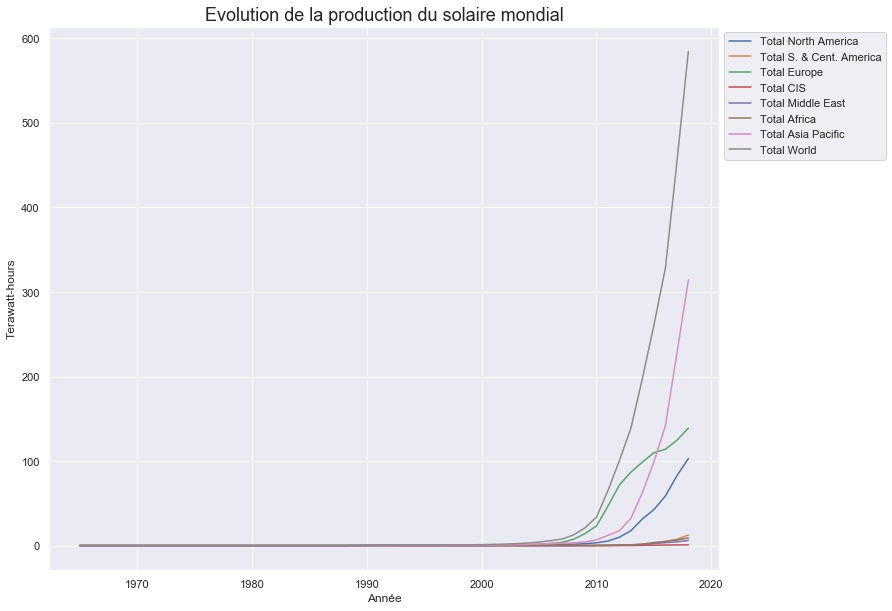

In [13]:
solar_production = pd.read_excel(dataPath+"data_production.xlsx", 12, header = 2)
unite = "Terawatt-hours"
solar_production = clean(solar_production,unite)
solar_production_total, solar_production = separate_total(solar_production, unite)
solar_production_total, solar_production = set_name_df(solar_production_total, "Total solar"), set_name_df(solar_production_total, "solar")
print_df(solar_production_total, "Evolution de la production du solaire mondial", unite)

### Wind 

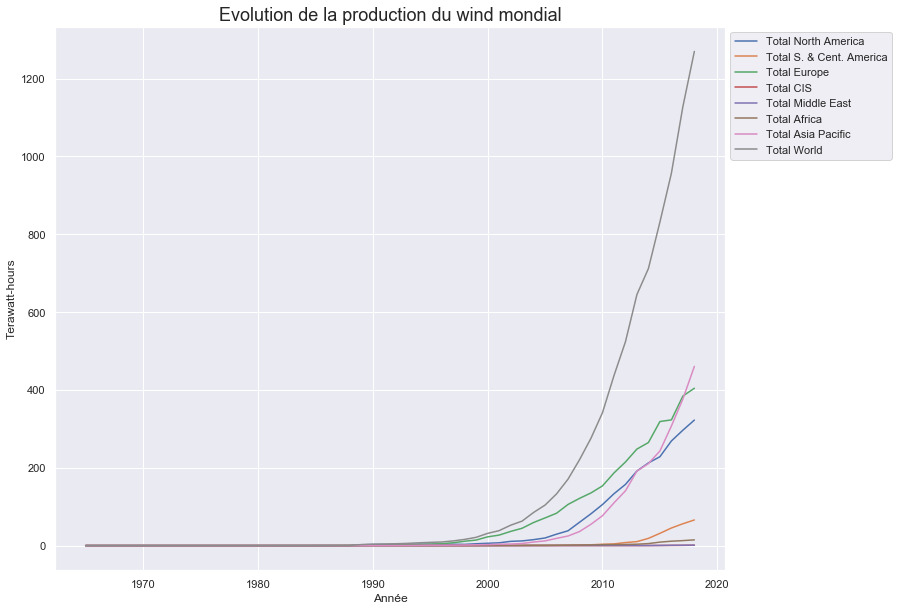

In [14]:
wind_production = pd.read_excel(dataPath+"data_production.xlsx", 13, header = 2)
unite = "Terawatt-hours"
wind_production = clean(wind_production,unite)
wind_production_total, wind_production = separate_total(wind_production, unite)
wind_production_total, wind_production = set_name_df(wind_production_total, "Total wind"), set_name_df(wind_production_total, "wind")

print_df(wind_production_total, "Evolution de la production du wind mondial", unite)

### Biomass :

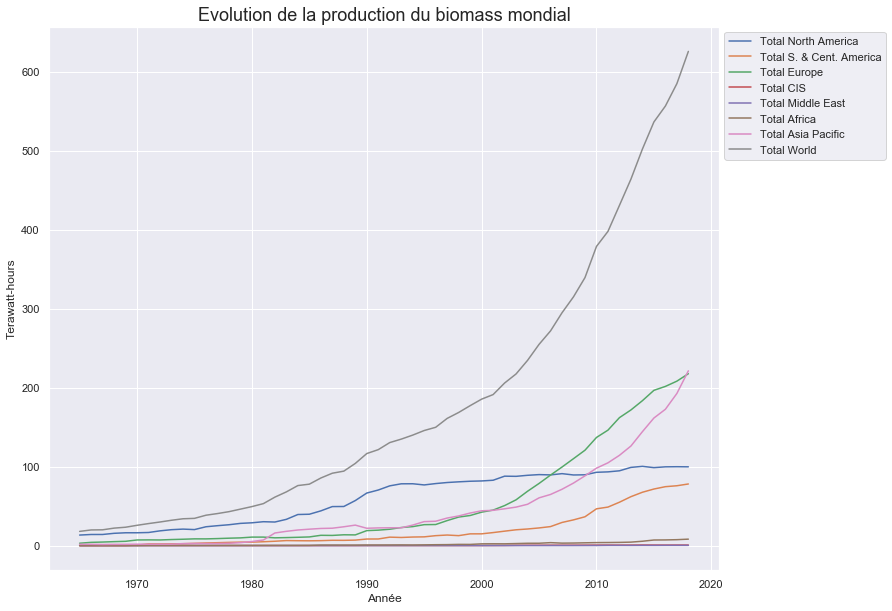

In [15]:
biomass_production = pd.read_excel(dataPath+"data_production.xlsx", 14, header = 2)
unite = "Terawatt-hours"
biomass_production = clean(biomass_production,unite)
biomass_production_total, biomass_production = separate_total(biomass_production, unite)
biomass_production_total, biomass_production = set_name_df(biomass_production_total, "Total biomass"), set_name_df(biomass_production_total, "biomass")
print_df(biomass_production_total, "Evolution de la production du biomass mondial", unite)


### Total :

In [16]:
def print_tot(list_df, title, unite) :
    plt.figure(figsize=(12,10))
    plt.title(title, fontSize=18)
    for k,df in enumerate(list_df) :   
        plt.plot(df.columns.values[:-5], df.iloc[-1][:-5], label=f"{df.name}")
    plt.legend(bbox_to_anchor = (1,1))
    plt.xlabel("Année")
    plt.ylabel(unite)
    plt.show()

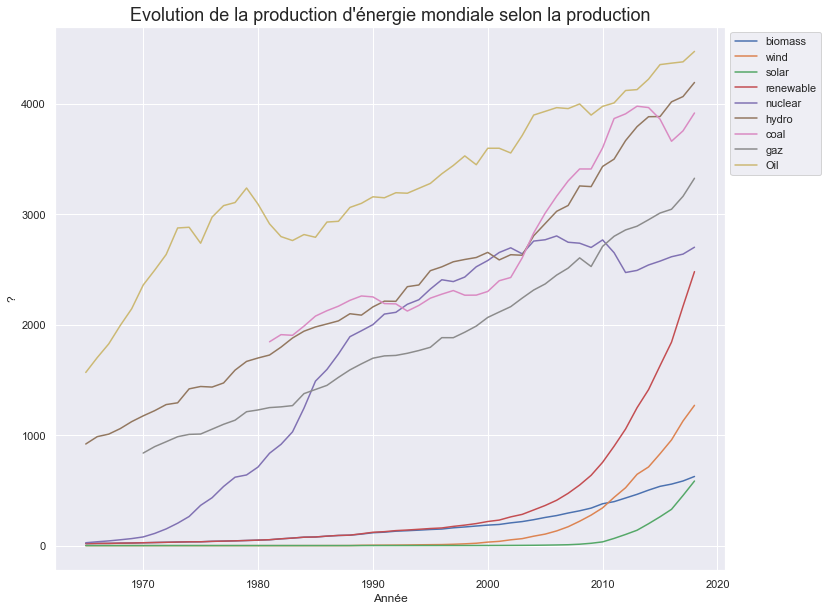

In [17]:
dfs= [biomass_production,wind_production,solar_production, renewable_production, 
           nuclear_production, hydro_production,coal_production, gaz_production, oil_production]
print_tot(dfs,
         title = "Evolution de la production d'énergie mondiale selon la production", 
         unite="?")

In [18]:
dfs= [biomass_production_total,wind_production_total,solar_production_total, renewable_production_total, 
           nuclear_production_total, hydro_production_total,coal_production_total, gaz_production_total, oil_production_total]


In [19]:
min_date = min(coal_production.T.index.values[:-5].astype(int))

def reshape_data (df) :
    df_copy = df.copy()
    df_copy = df_copy.T
    df_copy = df_copy.reset_index()
    df_copy = df_copy [:-5]
    header = np.array(df_copy.columns)
    header[0] = 'Date'
    df_copy = df_copy[1:]
    df_copy.columns = header
    df_copy = df_copy.melt(id_vars=['Date'], value_name=df.name)
    df_copy = df_copy[df_copy["Date"]>min_date]
    df_copy.name = df.name
    return df_copy

def concat_sources (dfs) :
    dataframes = []
    for df in dfs : 
        dataframes.append(reshape_data(df))
    return_df = dataframes[0]
    for df in dataframes[1:] :
        return_df=return_df.merge(df, on=["Date", "variable"])
    return return_df

t =  concat_sources(dfs)
t_copy = t.copy()
t=t.melt(id_vars=['Date', 'variable'], var_name="Energy", value_name = "Production")
t.Production=t.Production.astype(float)
t.Date=t.Date.astype(int)

In [20]:
np.unique(t.variable.values)

array(['Total Africa', 'Total Asia Pacific', 'Total CIS', 'Total Europe',
       'Total Middle East', 'Total North America',
       'Total S. & Cent. America', 'Total World'], dtype=object)

In [21]:
t.variable = t.variable.str.replace("Total ","").str.replace('S. & Cent. America',"Latin America").str.replace("CIS", "Russia")


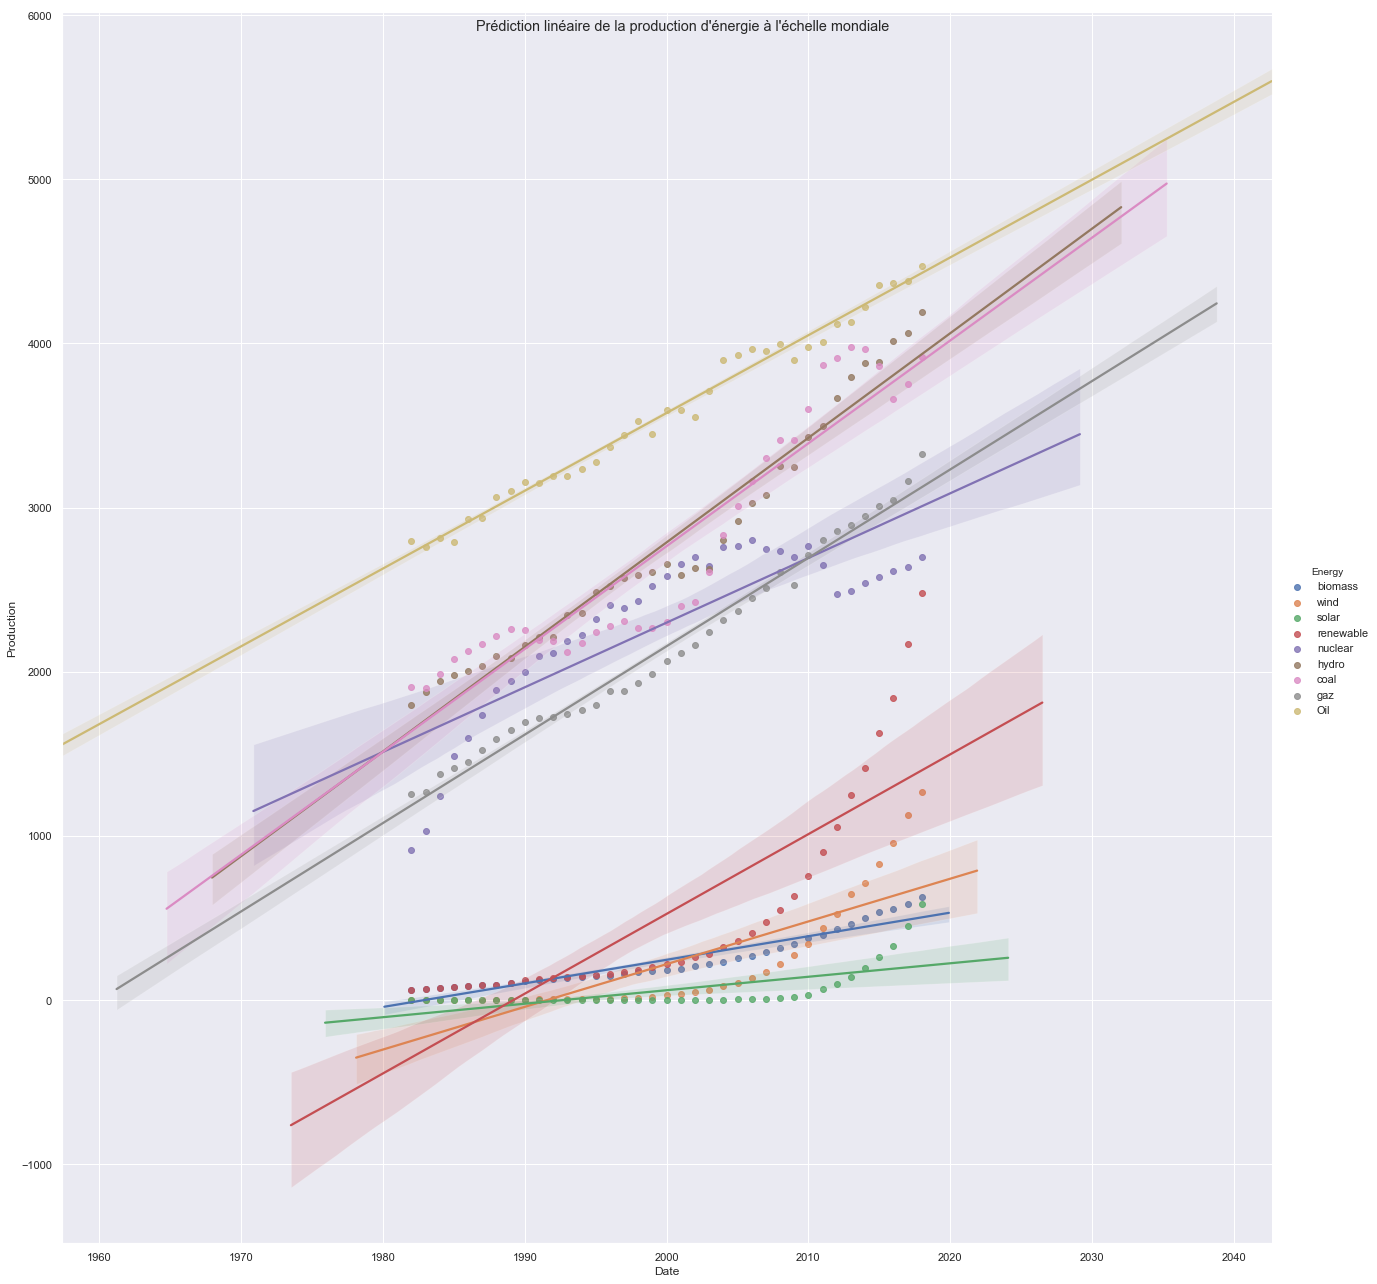

In [22]:
import seaborn as sns; sns.set(color_codes=True)
t_world=t[t["variable"]=="World"]
g = sns.lmplot(x="Date", y="Production", hue="Energy", data=t_world, height=18).fig.suptitle("Prédiction linéaire de la production d'énergie à l'échelle mondiale")


In [23]:
production_energy_by_region = t.rename(columns={"variable":"Country"}).copy()
dataPath ='/'.join(os.getcwd().split("/")[:-1])

demographic_grouped = pd.read_csv(dataPath+"/demographic_grouped.csv" )

In [24]:
merged_data = pd.merge(production_energy_by_region,demographic_grouped, on=["Date","Country"])

In [25]:
merged_data_cleaned = merged_data.copy()

In [26]:
merged_data_cleaned=merged_data_cleaned.drop(["Access to Electricity", "Nitrous Oxyd Emission", "Methan Oxyd Emission"], axis =1)

In [27]:
pathToSave = '/'.join(os.getcwd().split("/")[:-1])
for energy in merged_data_cleaned.Energy.unique() :
    temp = merged_data_cleaned[merged_data_cleaned.Energy == energy]
    temp.to_csv(pathToSave+"/production_"+energy+".csv")


In [30]:

merged_data_cleaned.to_csv(pathToSave+"/Co2_predicted.csv", index = False)

In [31]:
data_to_predict = merged_data_cleaned[merged_data_cleaned.Country == "World"]

In [32]:
data_to_predict = data_to_predict.set_index("Date")

### ARIMA model :

Nous allons utiliser l'algorithme ARIMA (Auto Regressive Integrated Moving Average) qui est la combination de deux model : 

- Autoregressive model : Ce modèle consiste à récupérer les lags de notre time series (lag = valeur à un instant t-k). Par exemple en considérant l'instant présent t, le lag -2 de notre série corresponds à la valeur de notre série à l'instant t-2 et à les inclures dans la prédiction de nouvelles valeurs
- Moving Average : qui permets de dire que notre variable à prédire (la prochaine valeur de la timeserie) dépends linéairement des erreurs passées réalisés dans notre time-series

Cet algorithme est pour les prédictions des time series à une seule variable et performe mieux quand les données présentent une saisonalitée. 

**Remplir les données manquantes avec une prédiction**

In [35]:
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from random import random
import statsmodels.api as sm
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.arima_model import ARIMA

def predict_timeseries_ARIMA (serie, p, d, q, max_date) :
    """ This function predict values for a given time serie
    using ARIMA algorithm with parameters p, d, q from the last 
    known date until max_date
    
    parameters: 
    - serie : represent our serie, should be a pandas object
    - p, d, q : parameters for ARIMA, should be choosen wisely 
            by checking the autocorrelation. 
    - max_date : Represents the max_date to predict
    
    By Kevin FERIN
    """
    if (type(serie)== pd.core.frame.Series) :
        serie = serie.to_frame()
    serie = serie.dropna()
    #autocorrelation_plot(serie)
    #plt.show()
    date_known = serie.index
    date_to_predict = [i for i in range (max(date_known)+1,max_date)]
    history = [x for x in serie.values]
    predictions = list()
    for t in range(len(date_to_predict)):
        model = ARIMA(history, order=(p,d,q))
        model_fit = model.fit(disp=0)
        output = model_fit.forecast()
        yhat = output[0]
        predictions.append(yhat[0])
        history.append(yhat[0])
    serie = serie.append(pd.DataFrame(data=predictions, index = date_to_predict, columns = serie.columns))
    return serie

In [36]:
data = data_to_predict.copy()
data = data.drop(["Country", "Energy", "Production"], axis = 1)
serie_predit = {}
for feature in data.columns :
    serie = data[feature].reset_index().groupby("Date").mean()
    serie.name = feature
    serie = predict_timeseries_ARIMA(serie , 5,1,0, max_date=2050)
    serie_predit[feature] = serie
    
#serie_predit

/home/kevin/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [37]:
series = list(serie_predit.values())
df_to_predict = series[0]
for i in range(1,len(series)) : 
    df_to_predict = df_to_predict.join(series[i])

In [38]:
data_to_predict.Energy.unique() 

array(['biomass', 'wind', 'solar', 'renewable', 'nuclear', 'hydro',
       'coal', 'gaz', 'Oil'], dtype=object)

In [39]:
data = data_to_predict.copy()
for energy in data.Energy.unique() : 
    energyData = data[data.Energy==energy].Production
    energyData.name = energy
    df_to_predict = df_to_predict.join(energyData)

**Nous avons donc un DataFrame df_to_predict avec les différentes features intéressante prédit jusqu'en 2050 et les productions par types d'énergie encore à prédire. Nous allons le sauvegarder dans le but de ne pas le perdre.**

In [40]:
savePath ='/'.join(os.getcwd().split("/")[:-1])
df_to_predict.to_csv(savePath+"/results/feature_predicted_2050_productions_to_predict", index=True)

In [41]:
predict_production = df_to_predict.copy()
for energy in data_to_predict.Energy.unique() :
    k = predict_timeseries_ARIMA(predict_production[energy], 1,2,0,2050)
    predict_production[energy] = k

In [42]:
predict_production.to_csv(savePath+"/results/production_predicted_2050", index=True)

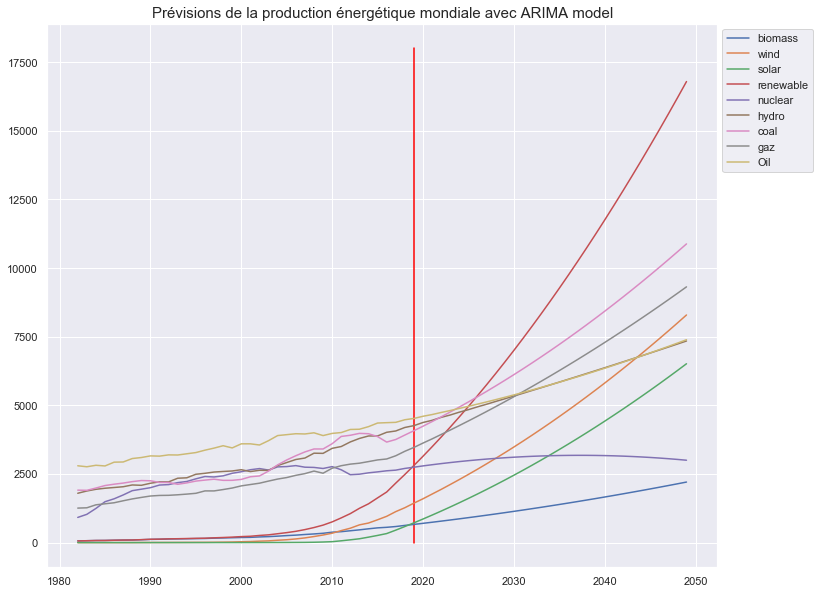

In [43]:
from datetime import datetime
def plot_productions_predicted(df) :
    plt.figure(figsize=(12,10))
    plt.plot([datetime.now().year]*2,[0,18000], 'red')
    for energy in data_to_predict.Energy.unique()  :
        plt.plot(df[energy], label =f"{energy}")
    plt.legend(bbox_to_anchor=(1,1))
    plt.title("Prévisions de la production énergétique mondiale avec ARIMA model", fontSize=15)
    
    plt.show()
plot_productions_predicted(predict_production)

### VAR Model : 

Cela corresponds à Vecteur Autoregressive Model. Ce model permets de prédire les valeurs de plusieurs paramètre en supposant que ces derniers influencent les autres. Nous allons prendre comme modèle les times series des productions des différentes sources d'énergies puis essayer de les prédire tous en même temps (dans un vecteur) en prenant en compte que si la production d'énergie renouvelable par exemple augmente fortement, les autres énergie ne peuvent pas augmenter de même. 

PS : Ceci est un test, je ne m'y connaît encore pas assez sur le sujet. Je vais sans doute faire des bétises sur les choix des hyperparamètres de ce modèle comme je l'ai fait également au dessus :) 

In [44]:
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller

In [46]:
df_train = df_to_predict.copy()
df_train = df_train[data_to_predict.Energy.unique()].dropna()


In [47]:
model = VAR(df_train)
model_fitted = model.fit()

/home/kevin/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [48]:

yhat=model_fitted.forecast(model_fitted.y, steps=30)

In [49]:
preds= [[ite[j] for ite in yhat] for j in range(len(yhat[0]))]

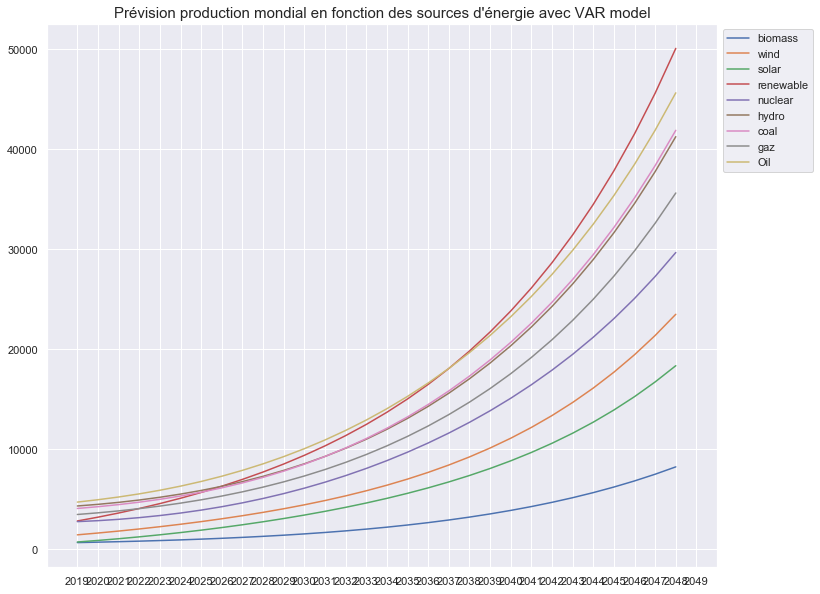

In [50]:
plt.figure(figsize=(12,10))
for k,el in enumerate(preds) : 
    plt.plot(el, label = f"{data.Energy.unique()[k]}")
plt.xticks(range(32), labels = [str(i) for i in range(2019,2050)])
plt.legend(bbox_to_anchor=(1,1))
plt.title("Prévision production mondial en fonction des sources d'énergie avec VAR model", fontSize=15)
plt.show()

### Réseaux de neurones récurrent avec LSTM nodes : 

In [127]:
from keras.models import Sequential
from keras.layers.core import Activation
from keras.layers import LSTM, Dense, Input, concatenate
from keras.models import Model

def build_model (df, train_length, test_length) :
    input = Input(shape=(5,1))
    layer = Dense(64, activation ='relu')(input)
    
    output = Dense (1, activation = 'sigmoid', name = "prediction")(layer)
    """inputs =[]
    for feature in df.columns : 
        inputs.append(Input(shape=(1,1)))
    layers =[]
    for inp in inputs : 
        layers.append(LSTM(32, return_sequences=False)(inp))
    output = concatenate(layers, axis=1)
    output = Dense(1, activation ='sigmoid', name= "weightedAverage")(output)"""
    print(output)
    model = Model(
        inputs = input,
        outputs = output
    )
    model.compile(optimizer='rmsprop', loss='mse' )
    print(layer)
    return model

In [128]:
df = df_to_predict.drop(list(df_to_predict.columns)[6:],axis=1)
df_pred = df.loc[2019:,:]
y_train,df_train = df.dropna()["biomass"],df.dropna().drop(["biomass"], axis=1)

In [129]:
rnn = build_model(df_train,37,31)
rnn.fit(
    df_train.values.reshape(37,5,1),
    y_train.values.reshape(37,1,1),
    batch_size=5
    ,
    epochs = 100
)

Tensor("prediction_27/Sigmoid:0", shape=(None, 5, 1), dtype=float32)
Tensor("dense_14/Relu:0", shape=(None, 5, 64), dtype=float32)


ValueError: Error when checking target: expected prediction to have shape (5, 1) but got array with shape (1, 1)

In [126]:
x_test = df_pred.drop(["biomass"], axis=1)
y_pred = rnn.predict(x_test.values.reshape(31,5,1))

In [107]:
y_pred

array([[[0.09956479],
        [0.3665918 ],
        [0.09956479],
        [0.09956479],
        [0.09956479]],

       [[0.09956479],
        [0.3674923 ],
        [0.09956479],
        [0.09956479],
        [0.09956479]],

       [[0.09956479],
        [0.36840743],
        [0.09956479],
        [0.09956479],
        [0.09956479]],

       [[0.09956479],
        [0.36925983],
        [0.09956479],
        [0.09956479],
        [0.09956479]],

       [[0.09956479],
        [0.370045  ],
        [0.09956479],
        [0.09956479],
        [0.09956479]],

       [[0.09956479],
        [0.37084252],
        [0.09956479],
        [0.09956479],
        [0.09956479]],

       [[0.09956479],
        [0.3716423 ],
        [0.09956479],
        [0.09956479],
        [0.09956479]],

       [[0.09956479],
        [0.37243855],
        [0.09956479],
        [0.09956479],
        [0.09956479]],

       [[0.09956479],
        [0.37323862],
        [0.09956479],
        [0.09956479],
        [0.09956